<a href="https://colab.research.google.com/github/TheXpingu1n/TheXpingu1n/blob/main/HeartAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis**

*importing libraries and the file*

In [10]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving heart.csv to heart.csv


In [11]:
file = pd.read_csv('/content/heart.csv')
data = pd.DataFrame(file)

In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


*dropping a specific null in **''thal''** column*

In [53]:
data = data.drop_duplicates()
value_to_drop = 0
column_to_check = 'thal'
data = data.drop(data[data[column_to_check] == value_to_drop].index)

In [54]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.433333,0.683333,0.963333,131.626667,246.743333,0.146667,0.526667,149.663333,0.326667,1.046667,1.396667,0.723333,2.330000,0.543333
std,9.076720,0.465953,1.032250,17.619557,51.837514,0.354364,0.526192,22.889658,0.469778,1.163760,0.616920,1.008387,0.585014,0.498951
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Graphs needed to analyse data


1.   Sex based analysis
2.   Age based analysis
3.   Target based analysis



# Age distribution
*Close to be normally distributed*

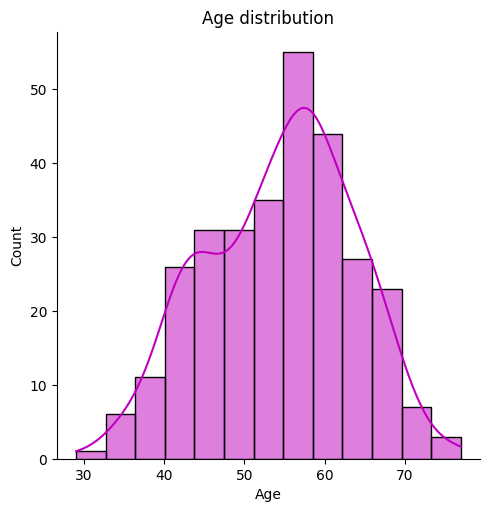

In [55]:
sns.displot(data['age'], kde=True, color='m')
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Distribution of Age Classified by Sex

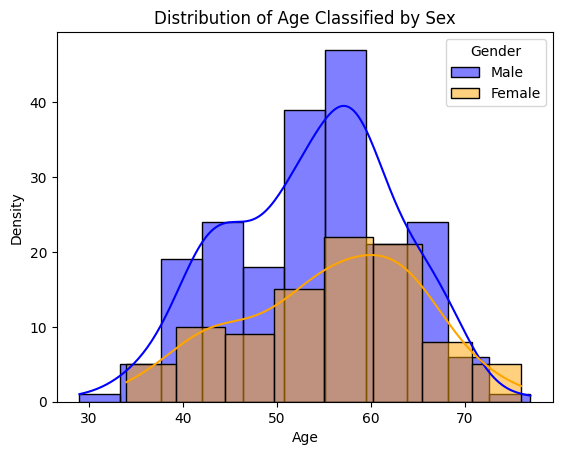

In [56]:
sns.histplot(data=data[data['sex'] == 1], x='age', color='blue', label='Male', kde=True)
sns.histplot(data=data[data['sex'] == 0], x='age', color='orange', label='Female', kde=True)
plt.title('Distribution of Age Classified by Sex')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Gender')
plt.show()

Sex based analysis

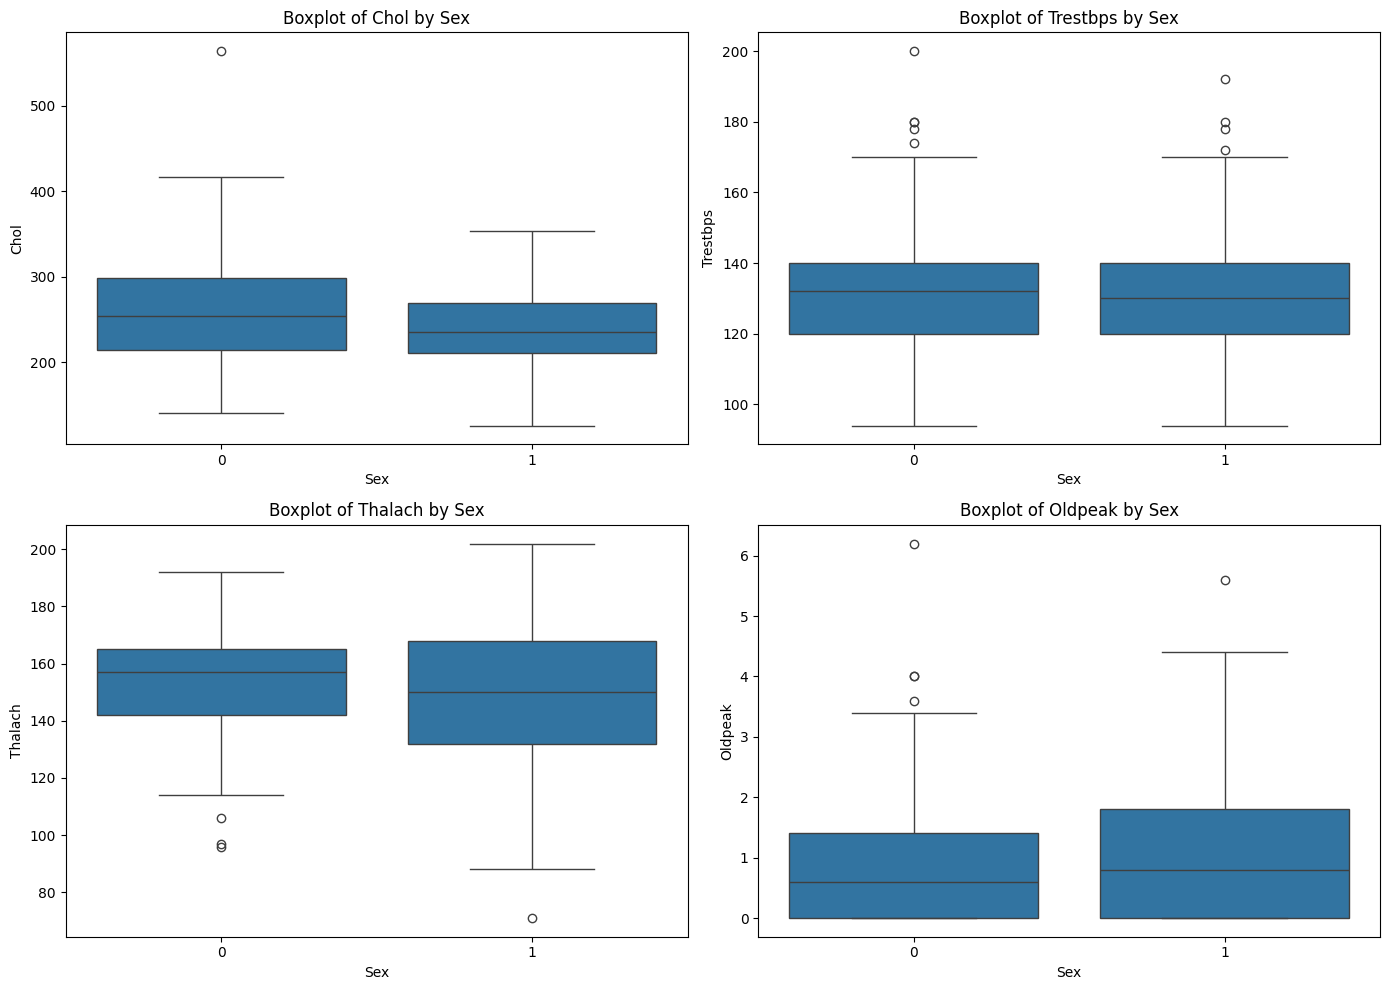

In [61]:
col = ['chol', 'trestbps', 'thalach', 'oldpeak']

# Plotting subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, ax in enumerate(axes.flatten()):
    if i < len(col):
        sns.boxplot(data=data, x='sex', y=col[i], ax=ax)
        ax.set_xlabel('Sex')
        ax.set_ylabel(col[i].capitalize())
        ax.set_title(f'Boxplot of {col[i].capitalize()} by Sex')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

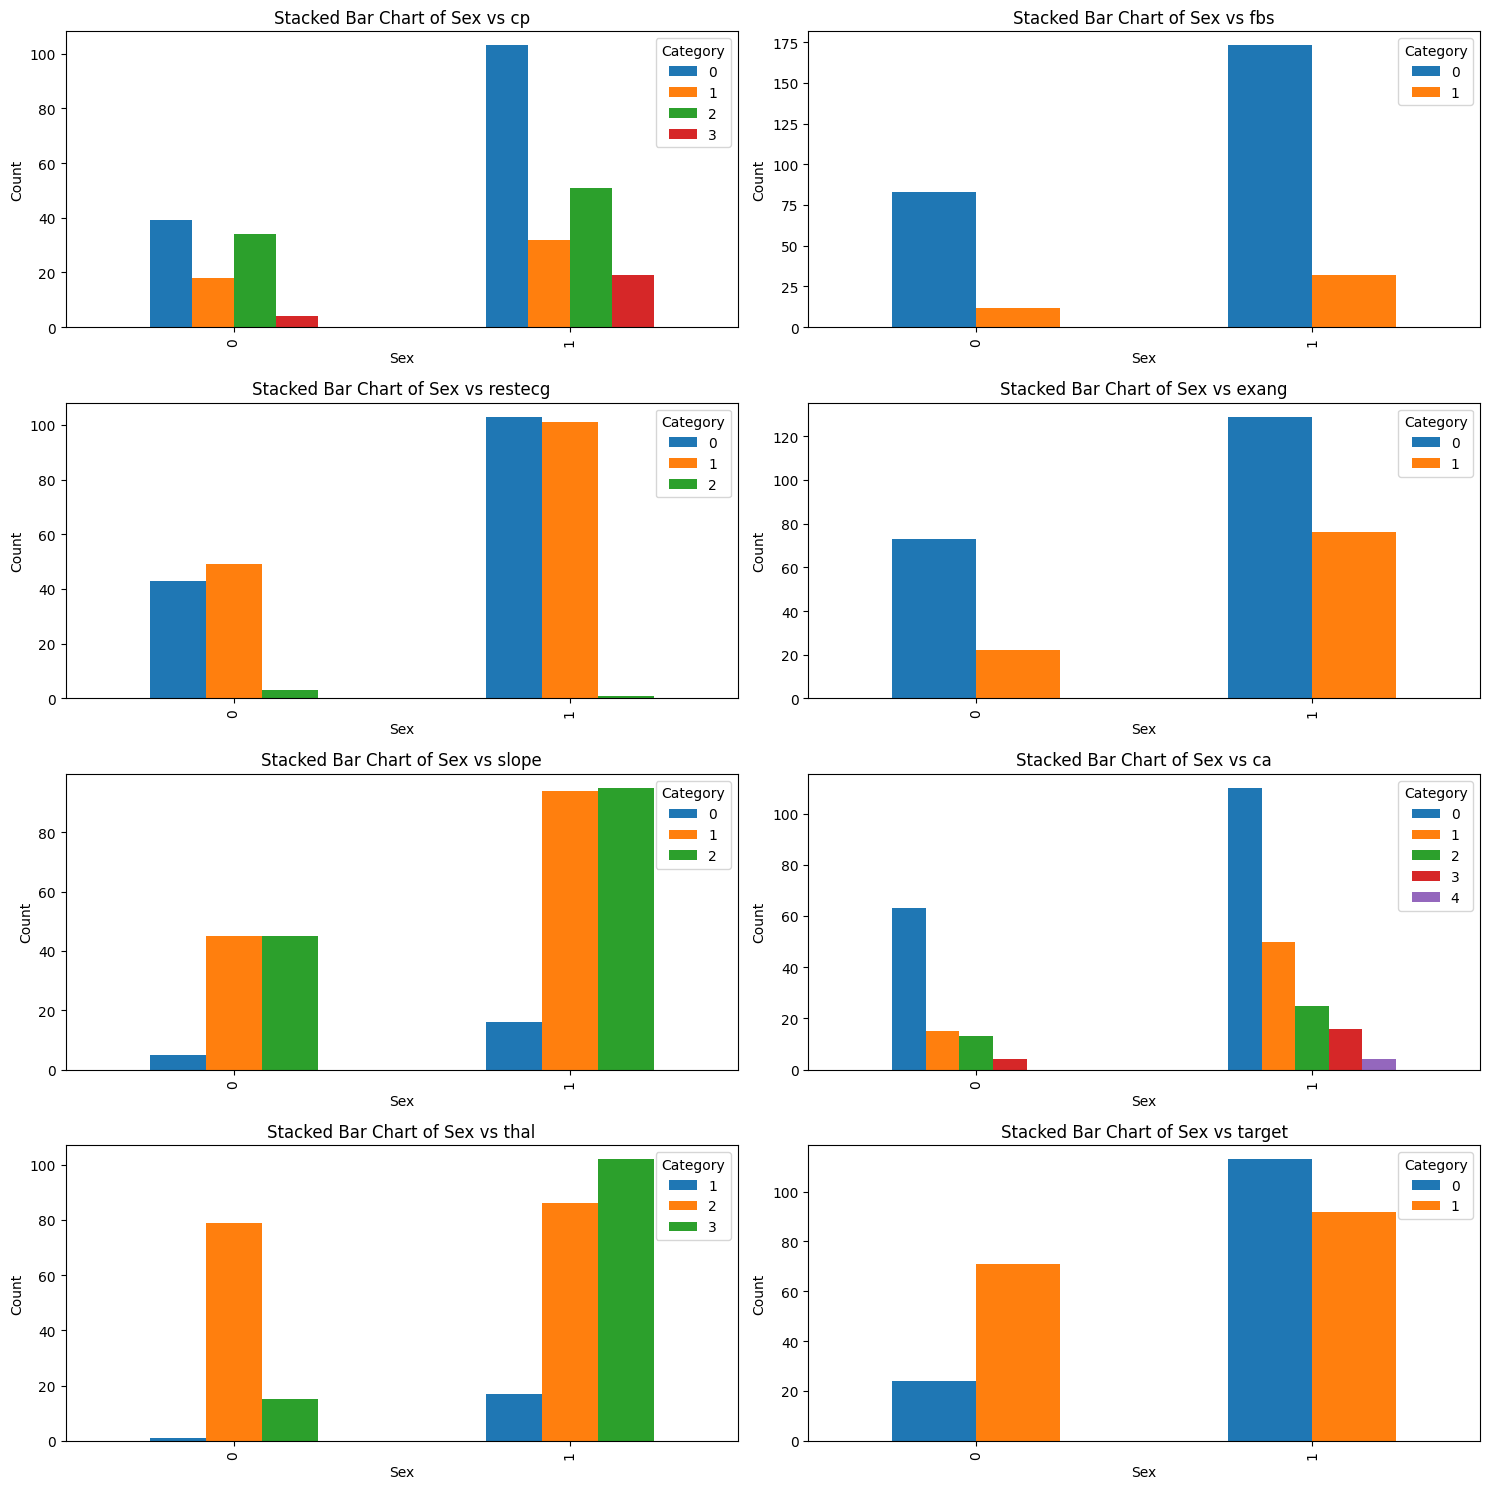

In [57]:
col = [ 'cp',  'fbs'  ,'restecg' ,  'exang' , 'slope' , 'ca' , 'thal'  ,'target', 'age']
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
for i, ax in enumerate(axes.flatten()):
    if i < len(col):
        grouped_data = data.groupby(['sex', col[i]]).size().unstack().fillna(0).astype(int)
        grouped_data.plot(kind='bar', stacked=False, ax=ax)
        ax.set_xlabel('Sex')
        ax.set_ylabel('Count')
        ax.set_title(f'Stacked Bar Chart of Sex vs {col[i]}')
        ax.legend(title='Category')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

Age based Analysis

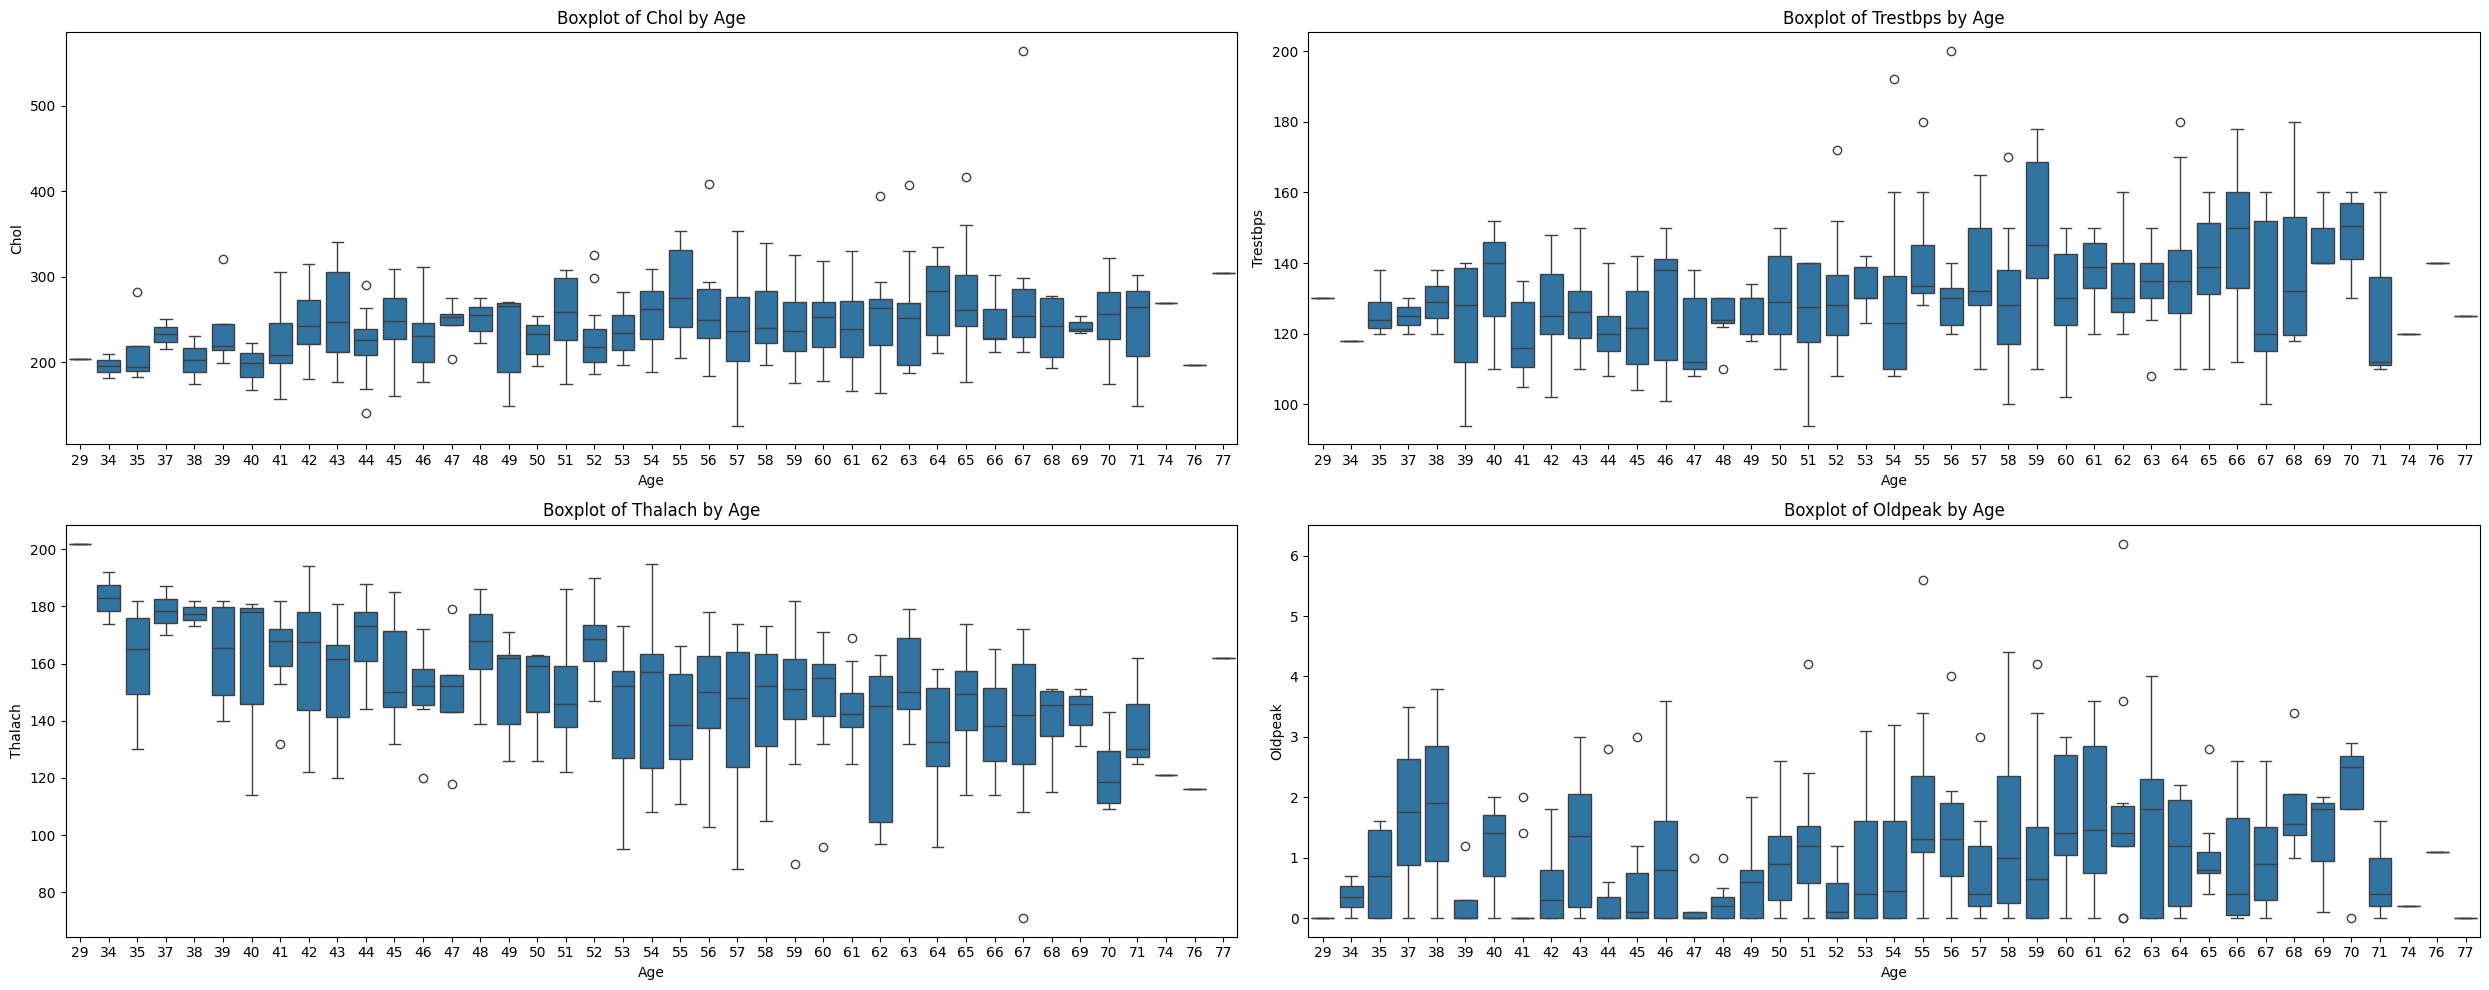

In [64]:
col = ['chol', 'trestbps', 'thalach', 'oldpeak']

# Plotting subplots
fig, axes = plt.subplots(2, 2, figsize=(25, 10))
for i, ax in enumerate(axes.flatten()):
    if i < len(col):
        sns.boxplot(data=df, x='age', y=col[i], ax=ax)
        ax.set_xlabel('Age')
        ax.set_ylabel(col[i].capitalize())
        ax.set_title(f'Boxplot of {col[i].capitalize()} by Age')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

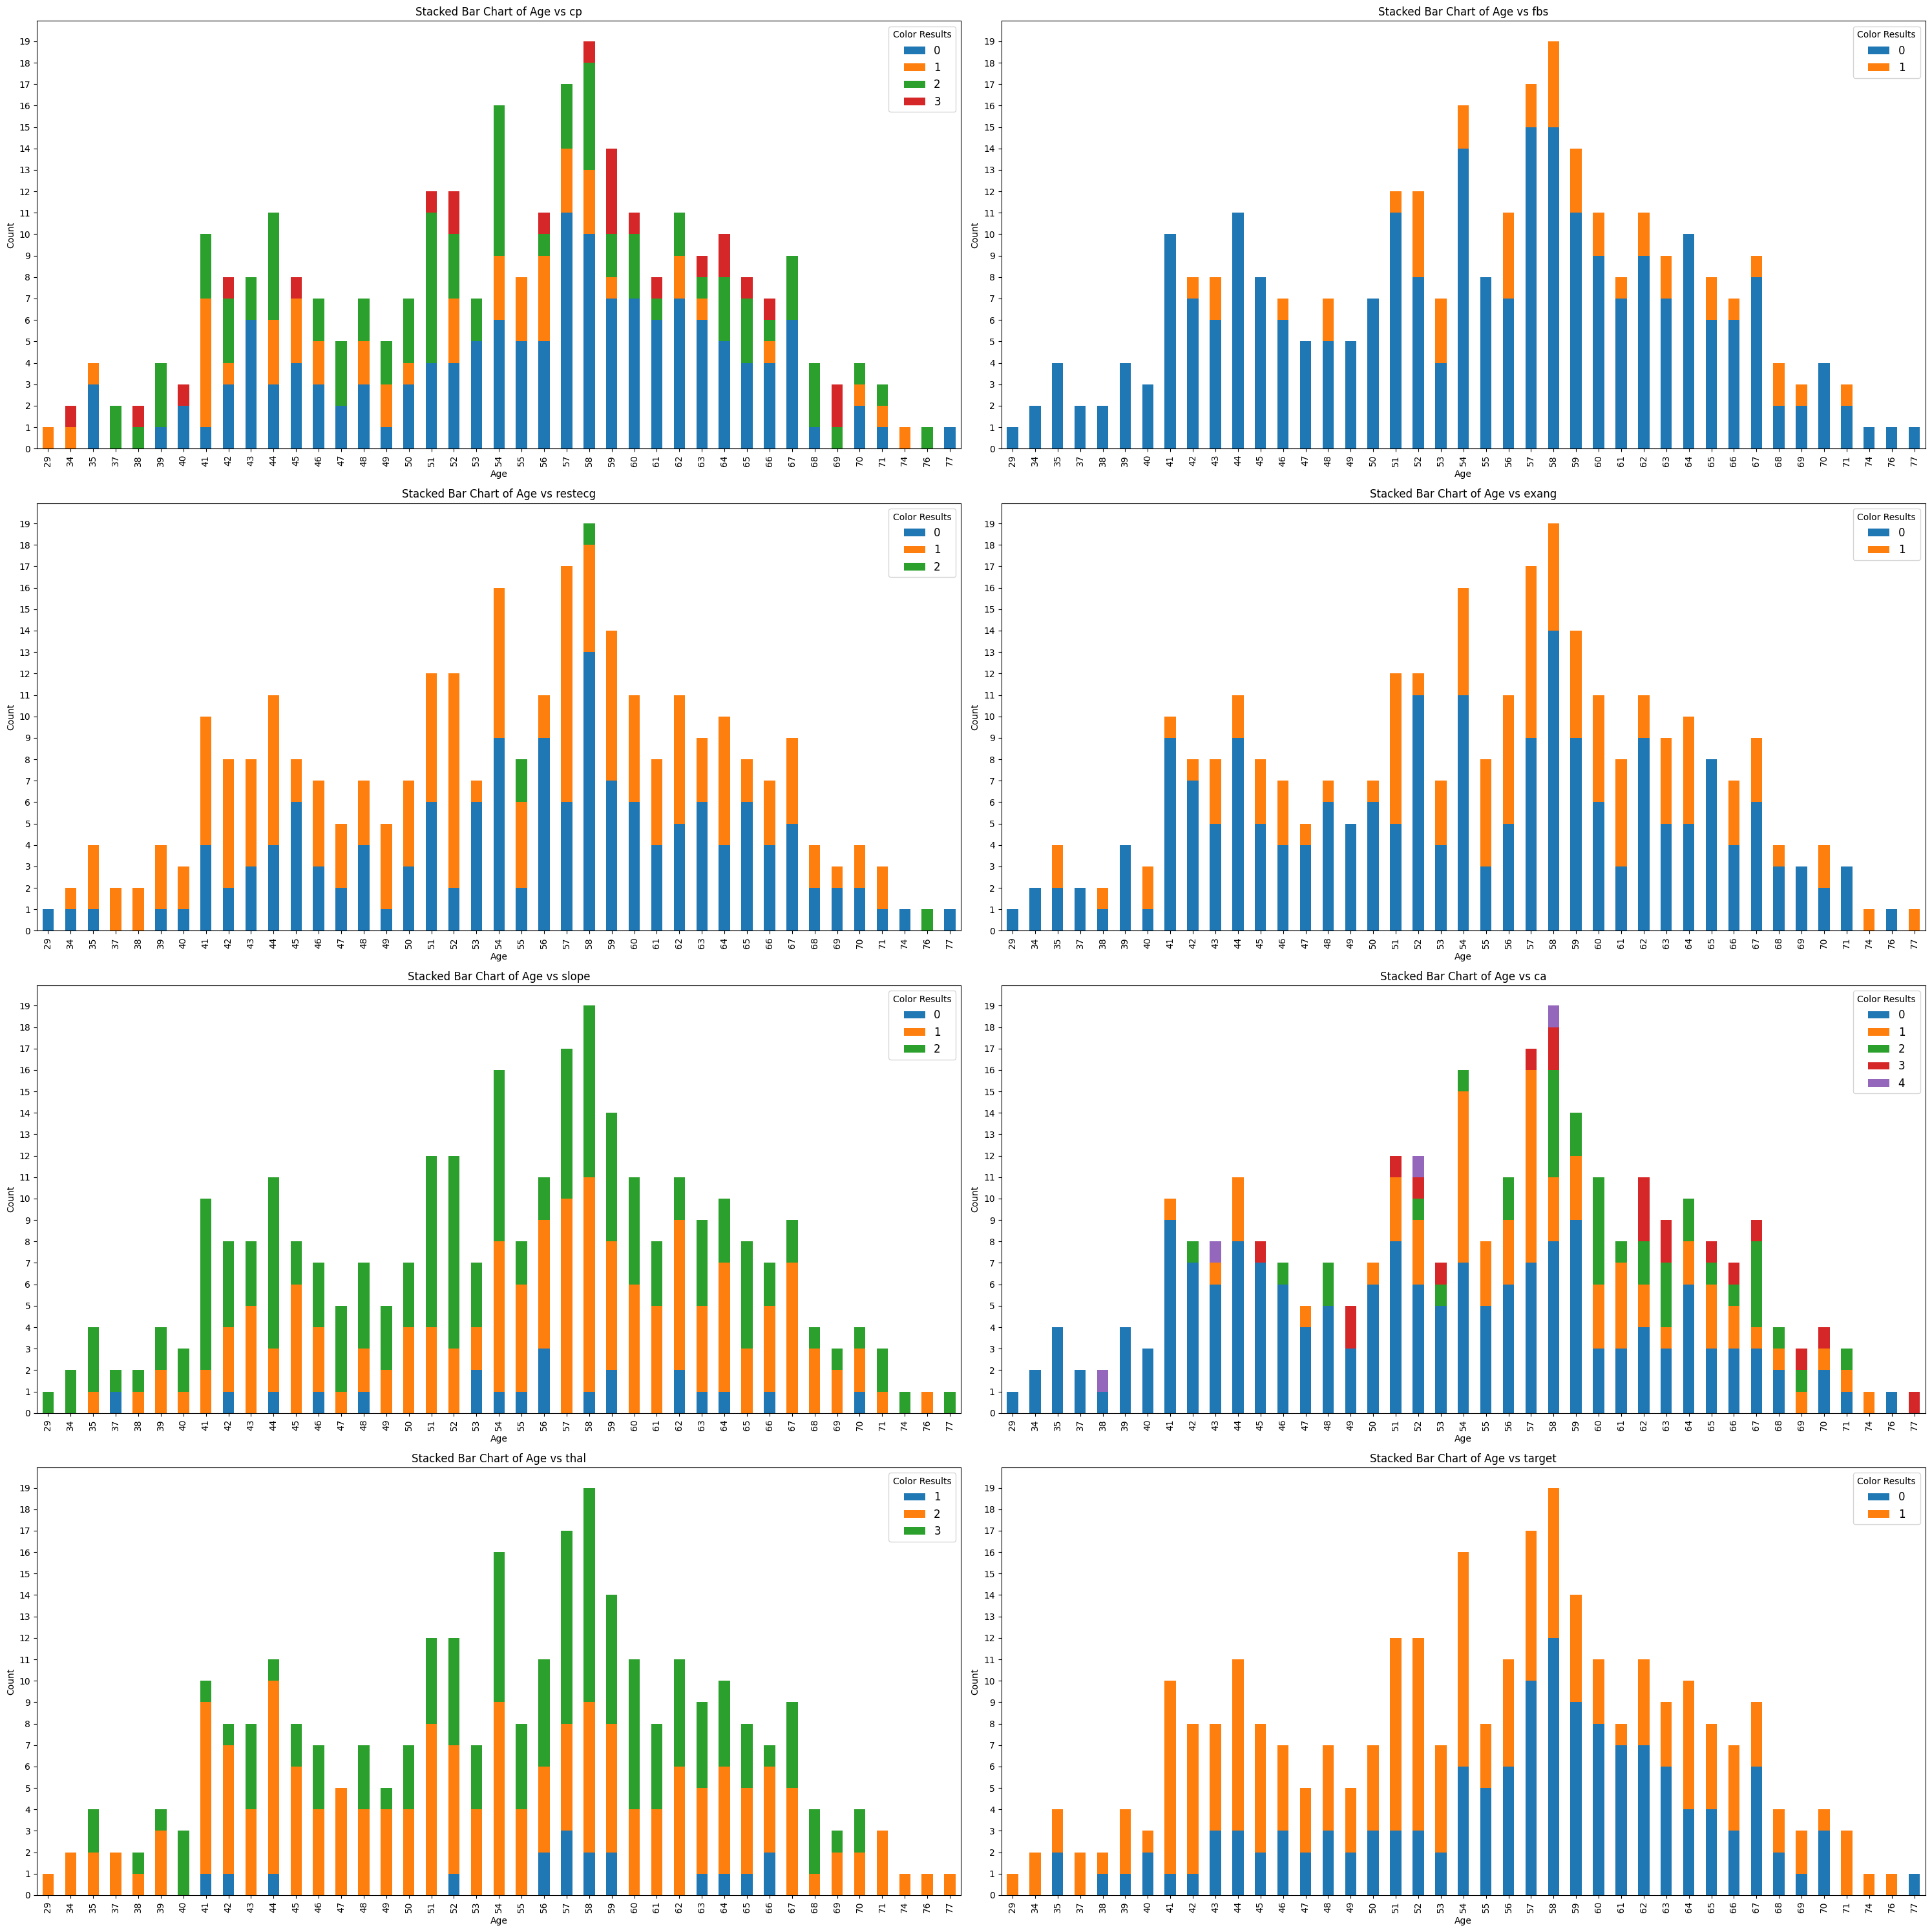

In [58]:
col = [ 'cp',  'fbs'  ,'restecg' ,  'exang' , 'slope' , 'ca' , 'thal'  ,'target']
fig, axes = plt.subplots(4, 2, figsize=(30, 30))
for i, ax in enumerate(axes.flatten()):
    if i < len(col):
        grouped_data = data.groupby(['age', col[i]]).size().unstack().fillna(0).astype(int)
        grouped_data.plot(kind='bar', stacked=True, ax=ax)
        ax.set_xlabel('Age')
        ax.set_ylabel('Count')
        ax.set_title(f'Stacked Bar Chart of Age vs {col[i]}')
        ax.legend(title='Color Results', fontsize='large')
        ax.set_yticks(range(max(grouped_data.sum(axis=1)) + 1))
    else:
        ax.axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()





### Target based analysis




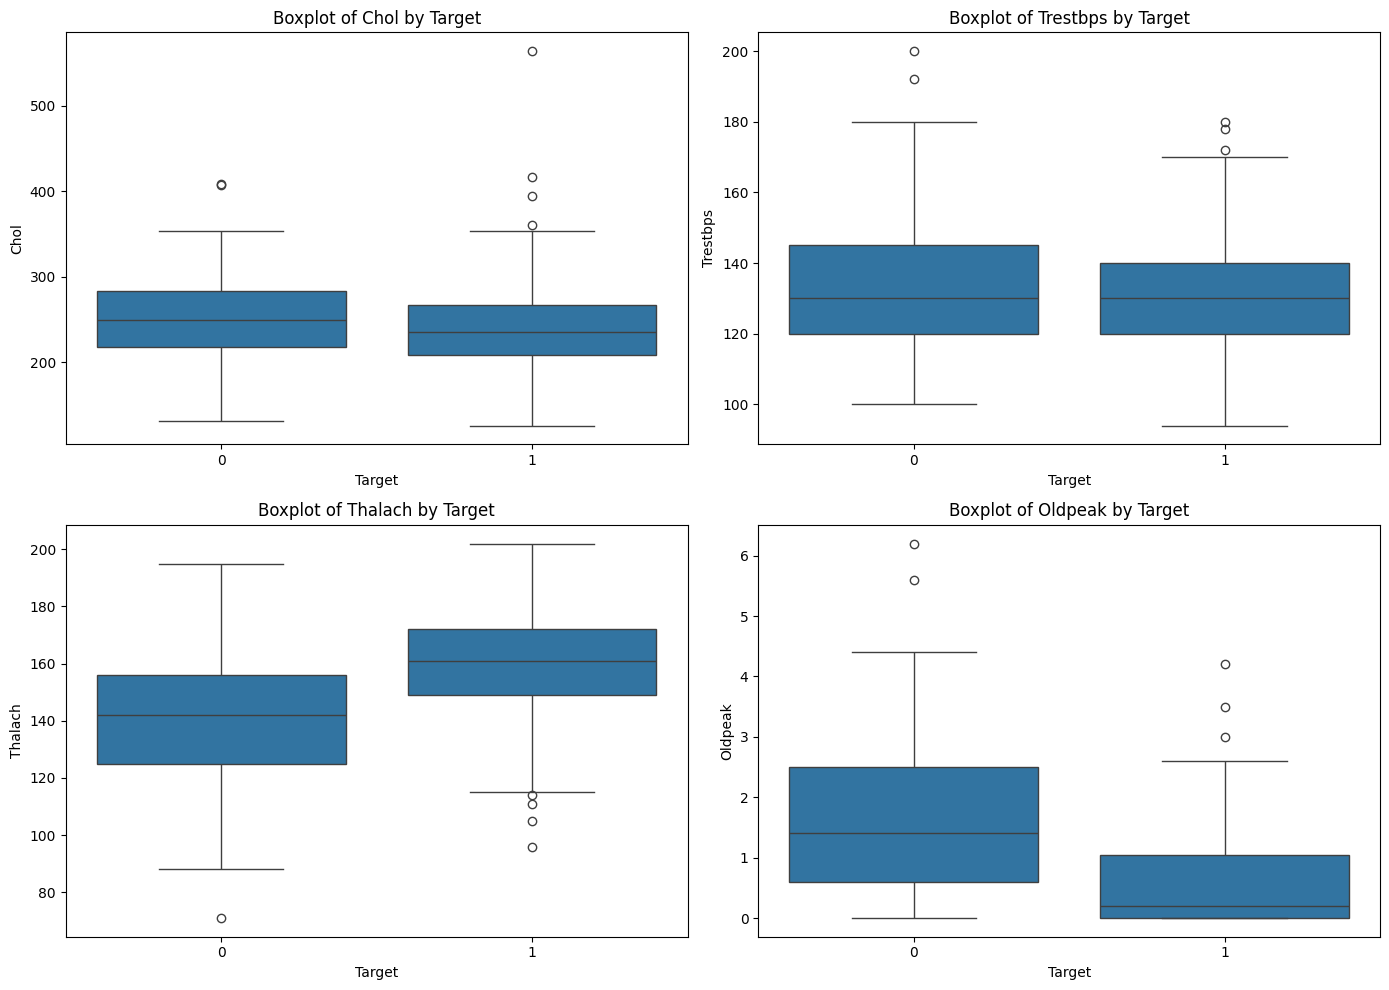

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, ax in enumerate(axes.flatten()):
    if i < len(col):
        sns.boxplot(data=df, x='target', y=col[i], ax=ax)
        ax.set_xlabel('Target')
        ax.set_ylabel(col[i].capitalize())
        ax.set_title(f'Boxplot of {col[i].capitalize()} by Target')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

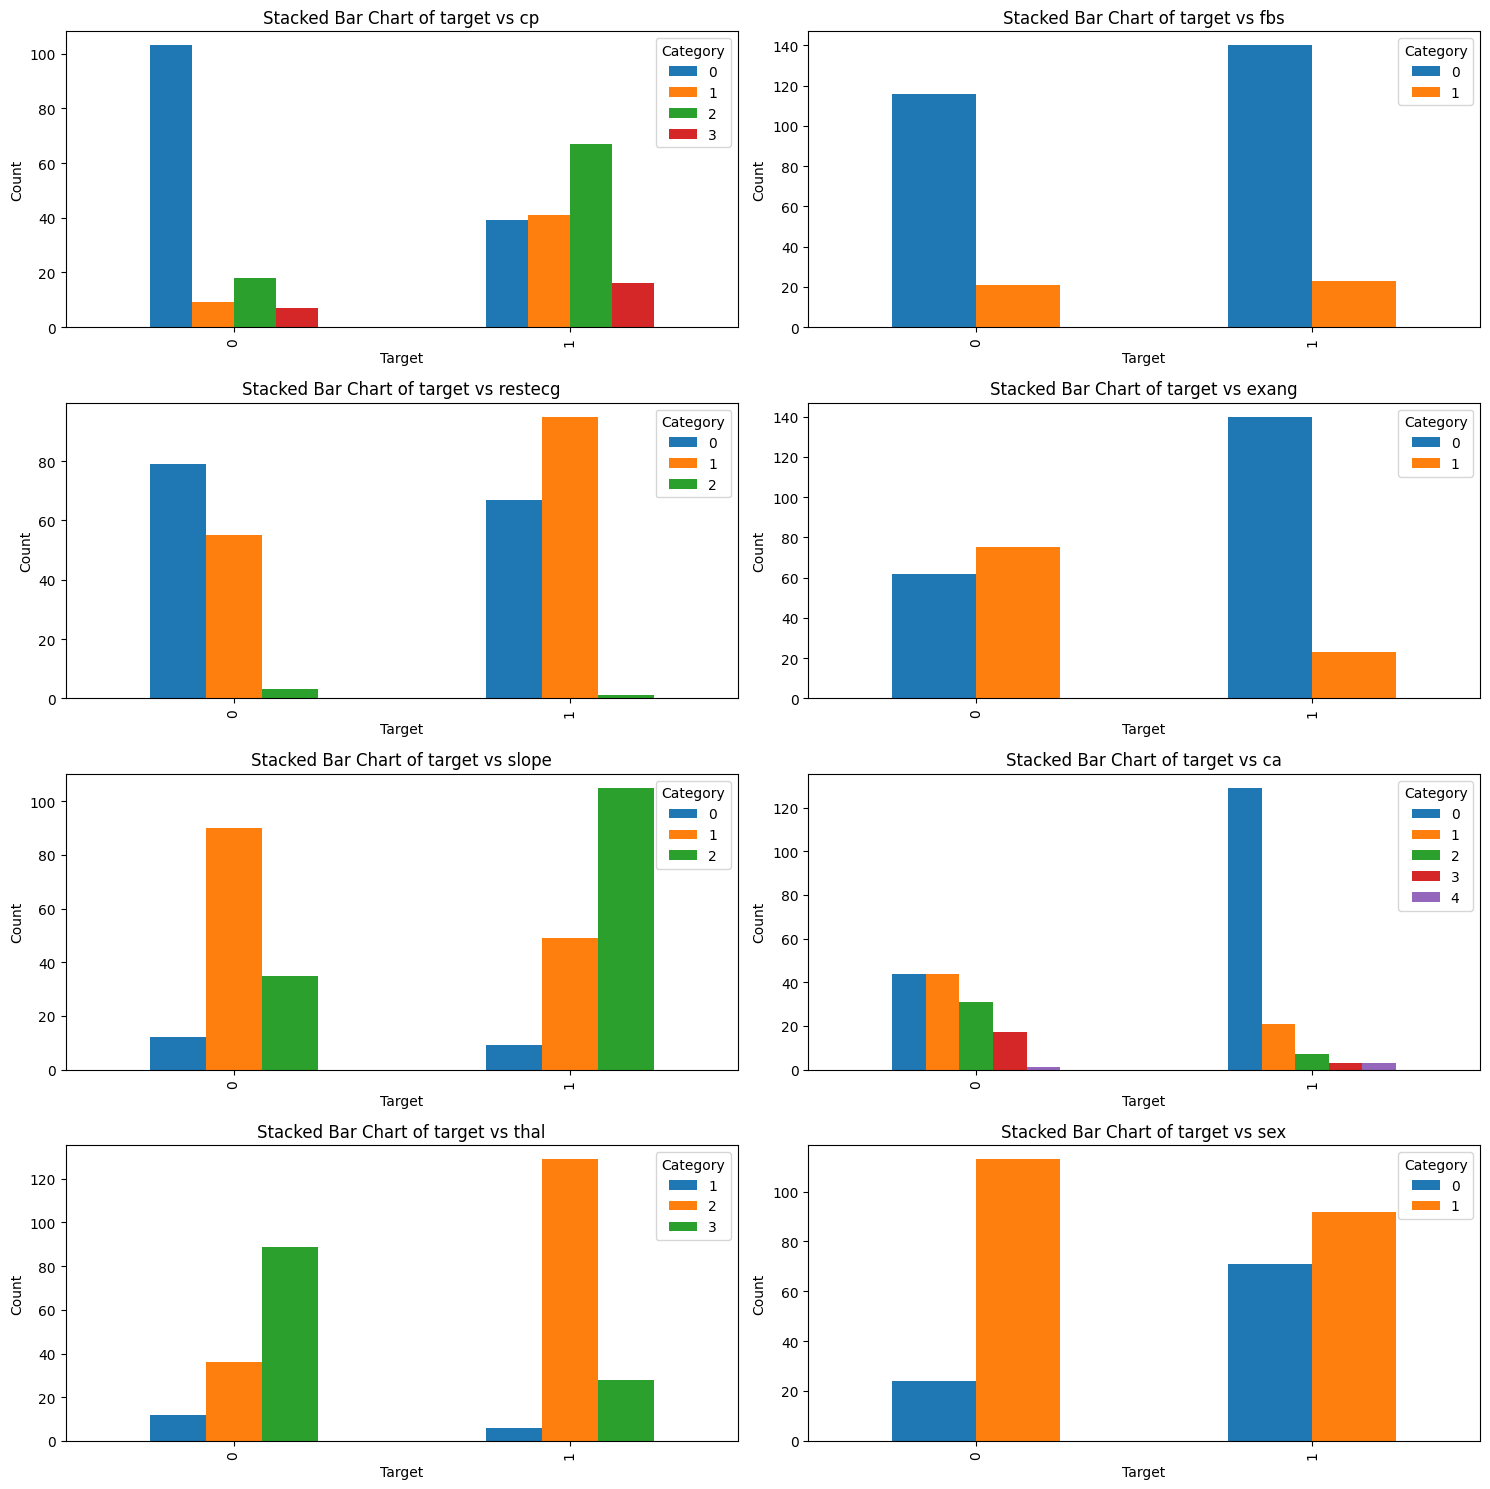

In [60]:
col = [ 'cp',  'fbs'  ,'restecg' ,  'exang' , 'slope' , 'ca' , 'thal', 'sex', 'age']
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
for i, ax in enumerate(axes.flatten()):
    if i < len(col):
        grouped_data = data.groupby(['target', col[i]]).size().unstack().fillna(0).astype(int)
        grouped_data.plot(kind='bar', stacked=False, ax=ax)
        ax.set_xlabel('Target')
        ax.set_ylabel('Count')
        ax.set_title(f'Stacked Bar Chart of target vs {col[i]}')
        ax.legend(title='Category')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()